<a href="https://colab.research.google.com/github/biplobsd/clef2022/blob/main/multilabel_text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CLef 2022 -  CheckThat!** DIU_SpeedOut
Task 3 - Experiment -
Fake News Detection
<br>
AWD_LSTM (Fast.ai)
<br><br>


Read More : https://sites.google.com/view/clef2022-checkthat/tasks/task-3-fake-news-detection?authuser=0
<br>
Repo: https://github.com/biplobsd/clef2022
<br>
Source: https://github.com/muhammadhammadjamil/multilabel_text_classification_using_fastai


In [ ]:
# Dataset is Restricted for shearing 
# Access Request https://zenodo.org/record/6508748
# !gdown 
# !gdown 

In [ ]:
from IPython.display import clear_output
!pip install fastai==2.6.3
clear_output()

In [ ]:
import fastai
fastai.__version__

'2.6.3'

In [ ]:
from fastai.text.all import *
import pandas as pd

In [ ]:
import math
data_raw = pd.read_csv('combine.csv')
data_raw = data_raw.rename(columns={'our rating':'category'})
data_raw['category'] = data_raw.category.map({'TRUE': 'true','true':'true', 'FALSE': 'false','false':'false', 'partially false': 'partially false', 'other': 'other'})
data_raw['title'] = data_raw['title'].replace(math.nan,' ')
data_raw['fullmsg'] = data_raw['title'] + ' ' + data_raw['text']
data_raw = data_raw.drop(labels=['public_id','text', 'title'], axis=1)
data_raw = data_raw.rename(columns={'fullmsg':'text'})

In [ ]:
data_test = pd.read_csv('English_data_test_release_with_rating.csv')
data_test = data_test.rename(columns={'our rating':'category'})
data_test['category'] = data_test.category.map({'True': 'true', 'FALSE': 'false','false':'false', 'Partially false': 'partially false', 'Other': 'other'})
data_test['title'] = data_test['title'].replace(math.nan,' ')
data_test['fullmsg'] = data_test['title'] + ' ' + data_test['text']
data_test = data_test.drop(labels=['ID','text', 'title'], axis=1)
data_test = data_test.rename(columns={'fullmsg':'text'})

In [ ]:
data_raw

,category,text
0,false,"You Can Be Fined $1,500 If Your Passenger Is Using A Mobile Phone, Starting Next Week Distracted driving causes more deaths in Canada than impaired driving .It’s why every province and territory has laws against driving while operating a cell phone. “Tell your passengers to stay off their phones while you are driving. Such measures are more than necessary now, as distracted driving has claimed more lives than impaired driving in provinces like British Columbia, Ontario, Quebec, Alberta, Nova Scotia, Manitoba, Newfoundland and Labrador. “Mobile phones, even when held by a passenger, can be ..."
1,partially false,"Missouri lawmakers condemn Las Vegas shooting Missouri politicians have made statements after the mass shooting late Sunday night in Las Vegas. In a tweet, Republican Senator Roy Blunt said he was saddened by the tragic loss of life and that his thoughts were with the families affected by” this horrific attack”. Democratic Senator Claire McCaskill issued a statement strongly condemning the action and offering support law enforcement personnel looking into the matter. “Firing upon a crowd of innocent concert goers is an act of unimaginable evil and my deepest condolences go out to all th..."
2,partially false,"CBC Cuts Donald Trump's 'Home Alone 2' Cameo Out of Broadcast Home Alone 2: Lost in New York is full of violence that, in my opinion, exceeds the physical comedy of the original film and is borderline barbarism. The main antagonists were subjected to bricks thrown at them from atop a building, being shot with a staple gun, having their heads lit afire, and being electrocuted. It is actually hard to watch. But, for CBC TV in Canada, the following scene was too much, and had to be removed from their broadcast of the film: That’s right, ComicBook.com reports that CBC edited out Donald Trump..."
3,false,"Obama’s Daughters Caught on Camera Burning US Flag at DC Protest – iolgue But things took a turn for the worse when riot police fired tear gas and rubber bullets into the crowd, all to clear the way for President Donald Jebediah Trump to waddle across the street for a photo op in front of a church he doesn’t attend, wave around a copy of a holy book he doesn’t read, and ramble like a psychotic dictator of a country he doesn’t love. Sasha and Malia had come to the protest equipped with military-grade gas masks, so they were not overcome by the tear gas that crippled so many of their fellow..."
4,false,"Leaked Visitor Logs Reveal Schiff’s 78 Visits to Epstein Isle It’s no secret that Epstein and Schiff share a long history of perversion. Last year, it was revealed by the FBI that the two corresponded by email on several occasions, totaling 256 emails. But, according to the latest leak, it goes much deeper than just emails. The reasons for the visits were not recorded, but based on the emails between the two men, we can assume they were for nefarious reasons. An FBI insider has leaked the extensive visitor logs to Epstein Isle. Several notable names were mentioned in the log, including B..."
...,...,...
1259,true,"Taxman fails to answer four million calls a year, as MPs warn people are not getting the help they need More than four million calls to the taxman are going unanswered, new figures show, as HM Revenue & Customs concedes the problem is almost twice as bad as previously disclosed. More than one in 10 callers to HMRC fails to get through to anyone, compared with just over one in 20 a year ago, prompting criticism from MPs that the service is letting down millions of self-employed people. The true scale of the problem is even worse than HMRC is prepared to admit, as its audit ignores taxpaye..."
1260,true,"Police catch 11‑year‑olds being used to sell drugs More under-18s are being taken to court for selling cannabis, with prosecutions up by 5.5 per cent over five years Children as young as 11 are being arrested for dealing cannabis as criminals increasingly use school pupils to distribute dr

In [ ]:
data_test

,category,text
0,partially false,"US Treasury deputy sec warns that shortages likely to continue until EVERYONE is jabbed The deputy secretary at the US Treasury has said that the only way to end the plague of empty shelves and high prices around the country is for every person in the world to be vaccinated. In an interview to ABC on Thursday, Wally Adeyemo, the Biden administration’s second-highest official in the Treasury Department, has commented on the ongoing shortages of consumer goods that have led many to mock the president as ‘Empty Shelves Joe’. Despite viral photos depicting thousands of cargo ships lined up a..."
1,other,"CNN Praises Taliban For Wearing Masks During Attack KABUL—Approximately twelve minutes after U.S. troops withdrew from Afghanistan, Taliban fighters have completely taken over the entire country. ""Woah, that's a bummer,"" said the Biden Administration's foreign policy team. ""We didn't see that one coming."" As the Taliban began its campaign of shooting and killing, as is their time-honored tradition, CNN anchors gushed with praise after noticing all the Taliban fighters were responsibly wearing masks to protect themselves and others from COVID. ""Wow! In the midst of the battle and bloodsh..."
2,false,"Tennessee Has Just LEGALIZED Government COVID Kidnappings! – The Daily Allegiant The vast majority of (oblivious) Americans have dismissed all this as a “conspiracy theory,” and now they’re shocked and frightened by the realization that covid internment camps are being actively deployed across America. On Friday, Tennessee Gov. Bill Lee signed Executive Order 83, which authorizes National Guard and State Guard troops to break into peoples’ homes, kidnap them at gunpoint, and take them to covid internment camps, all without any due process or respect for civil rights. Individuals can be ta..."
3,false,"MEDICAL SHOCKER: Scientists at Sloan Kettering discover mRNA inactivates tumor-suppressing proteins, meaning it can promote cancer (Natural News) There’s a secret layer of information in your cells called messenger RNA, that’s located between DNA and proteins, that serves as a critical link. Now, in a medical shocker to the whole world of vaccine philosophy, scientists at Sloan Kettering found that mRNA itself carries cancer CAUSING changes – changes that genetic tests don’t even analyze, flying completely under the radar of oncologists across the globe. So now, it’s time for independent ..."
4,false,"Study Results: Facemasks are Ineffective to Block Transmission of COVID-19 and Actually Can Cause Health Deterioration and Premature Death A recent study reported by the NCBI, which is under the National Institutes of Health, showed that masks do absolutely nothing to help prevent the spread of COVID-19 and their use is even harmful. NIH published a medical hypothesis by Dr. Baruch Vainshelboim. NOQ Report uncovered the study: …a DuckDuckGo search reveals it [the study] was picked up by ZERO mainstream media outlets and Big Tech tyrants will suspend people who post it, as political stra..."
...,...,...
607,false,"‘From October 20, the Covid pass and vaccination will be abolished on the entire territory of the EU’ – French Doctor DISTRIBUTE TO EVERYONE who does not want to be “vaccinated”. All vaccines will no longer be justified from 20.10.2021: verified information. https://ec.europa.eu/commission/presscorner/detail/fr/ip_21_3299 The European Union has approved () 5 therapies that will be available in all hospitals in the Member States for the treatment of Covid. These therapies have been approved by a decree of the European Council (European Parliament) and will be in force from 1/10, so they ..."
608,other,"Bill Gates' Former Doctor Says He 'Refused To Vaccinate' His Own Children The physician who served as Bill Gates’ private doctor in Seattle in the 1990s says the Microsoft founder and vaccine proponent “refused to vaccinate his own children” when they were young. “I don’t know if he had them vacci

In [ ]:
dls = data_raw

In [ ]:
dls.insert(0, 'text', dls.pop('text'))
dls = dls.rename(columns={'text':'Text', 'category': 'Category'})
dls.to_csv('justTextCategory.csv', index=False)
dls = TextDataLoaders.from_csv(path='/content/', csv_fname='justTextCategory.csv', text_col='Text', label_col='Category',bs=32)

In [ ]:
dls_test = data_test

In [ ]:
dls_test.insert(0, 'text', dls_test.pop('text'))
dls_test = dls_test.rename(columns={'text':'Text', 'category': 'Category'})
dls_test.to_csv('justTextCategory_test.csv', index=False)
dls_test = TextDataLoaders.from_csv(path='/content/', csv_fname='justTextCategory_test.csv', text_col='Text', label_col='Category',bs=32)

In [ ]:
dls.show_batch(max_n=2)


,text,category
0,"xxbos xxmaj when xxmaj will xxmaj the xxmaj planet xxmaj be xxmaj too xxmaj hot xxmaj for xxmaj humans ? xxmaj much , xxmaj much xxmaj sooner xxmaj than xxmaj you xxmaj imagine . xxmaj to read an xxunk version of this article , complete with interviews with scientists and links to further reading , click here . xxup i. ‘ doomsday ’ xxmaj xxunk beyond scientific reticence . xxmaj it is , i promise , worse than you think . xxmaj if your anxiety about global warming is dominated by fears of sea - level rise , you are barely xxunk the surface of what xxunk are possible , even within the lifetime of a teenager today . xxmaj and yet the swelling seas — and the cities they will drown — have so dominated the picture of global warming , and so overwhelmed our capacity for climate panic",partially false
1,"xxbos xxup hon . xxup stefan xxup i. xxup xxunk xxup erie xxup county xxup comptroller ’s xxup office xxup division xxup of xxup audit & xxup control 95 xxup franklin xxup street xxup buffalo , xxup new xxup york 14202 xxmaj january 29 , 2021 xxmaj erie xxmaj county xxmaj legislature 92 xxmaj franklin xxmaj street 4th xxmaj floor xxmaj buffalo , xxmaj new xxmaj york 14202 xxmaj dear xxmaj honorable xxmaj members : xxmaj the xxmaj erie xxmaj county xxmaj comptroller ’s xxmaj office has completed a report on certain personnel and food expenses charged to fund 252 , commonly known as xxup cares xxmaj act relief for municipalities . xxmaj our objectives were to : xxmaj update the amount of expenses for overtime attributed to fund 252 . xxmaj list xxmaj xxunk xxmaj confidential recipients of overtime payments . xxmaj update the amount expended for food from",partially false


In [ ]:
dls_test.show_batch(max_n=2)

,text,category
0,"xxbos xxmaj transcript : xxmaj night 2 of the first xxmaj democratic debate xxmaj for the second night in a row , a field of 10 xxmaj democrats who want to be their party ’s nominee for president debated onstage in xxmaj miami . xxmaj here are highlights from the debate , here are xxmaj the xxmaj fix ’s winners and xxunk , and below is the full transcript of the debate . xxup nbc xxup anchor xxup savannah xxup guthrie : xxmaj so , with that business taken care of , let ’s get to it . xxmaj and we ’re going to start today with xxmaj senator xxmaj sanders . xxmaj good evening to you . xxmaj you 've called for big , new government benefits , like universal health care and free college . xxmaj in a recent interview , you said you suspected that xxmaj americans",false
1,"xxbos xxmaj deported to xxmaj danger xxmaj the xxup us government has deported people to face abuse and even death in xxmaj el xxmaj salvador . xxmaj the xxup us is not solely responsible — salvadoran gangs who xxunk on deportees and xxmaj salvadoran authorities who harm deportees or who do little or nothing to protect them bear direct responsibility — but in many cases the xxup us is putting xxmaj salvadorans in harm ’s way in circumstances where it knows or should know that harm is likely . xxmaj of the estimated 1.2 million xxmaj salvadorans living in the xxmaj united xxmaj states who are not xxup us citizens , just under one - quarter are lawful permanent residents , with the remaining three - quarters lacking papers or holding a temporary or precarious legal status . xxmaj while xxmaj salvadorans have asylum recognition rates as high as 75",true


In [ ]:
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)

In [ ]:
learn.load('/content/drives/clef2020/fastai/v3')

In [ ]:

learn.data = dls

SuggestedLRs(valley=5.248074739938602e-05)

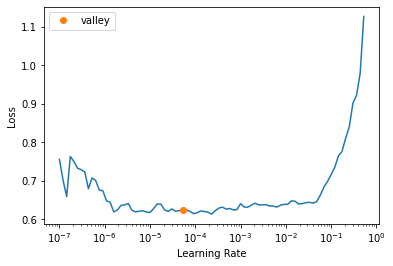

In [ ]:
learn.lr_find()

In [ ]:
learn.fit_one_cycle(4, lr_max=slice(10e-5, 0.00019054606673307717))

epoch,train_loss,valid_loss,accuracy,time
0,0.629308,0.616720,0.829365,01:12
1,0.626370,0.615097,0.833333,01:11
2,0.622240,0.606573,0.833333,01:11
3,0.621236,0.604095,0.829365,01:10


In [ ]:
learn.fine_tune(4, 0.0063095735386013985)

epoch,train_loss,valid_loss,accuracy,time
0,0.740948,0.868638,0.646758,06:01


epoch,train_loss,valid_loss,accuracy,time
0,0.770221,0.950987,0.578498,14:13
1,0.743279,0.868624,0.647895,14:10
2,0.644793,0.868298,0.660125,14:09
3,0.542135,0.893049,0.665529,14:09


In [ ]:
learn.fit(10)

epoch,train_loss,valid_loss,accuracy,time
0,0.746987,0.790097,0.750000,02:56
1,0.597554,0.821684,0.698413,02:56
2,0.460183,1.021765,0.666667,02:56
3,0.343937,0.950651,0.710317,02:56
4,0.253785,1.063179,0.658730,02:56
5,0.188026,1.295014,0.670635,02:56
6,0.143924,1.286563,0.642857,02:56
7,0.117884,1.275370,0.638889,02:56
8,0.094847,1.704863,0.626984,02:56
9,0.080219,1.226006,0.670635,02:56


In [ ]:
learn.show_results(max_n=5)

,text,category,category_
0,"xxbos xxmaj when xxmaj will xxmaj the xxmaj planet xxmaj be xxmaj too xxmaj hot xxmaj for xxmaj humans ? xxmaj much , xxmaj much xxmaj sooner xxmaj than xxmaj you xxmaj imagine . xxmaj to read an xxunk version of this article , complete with interviews with scientists and links to further reading , click here . xxup i. ‘ doomsday ’ xxmaj xxunk beyond scientific reticence . xxmaj it is , i promise , worse than you think . xxmaj if your anxiety about global warming is dominated by fears of sea - level rise , you are barely xxunk the surface of what xxunk are possible , even within the lifetime of a teenager today . xxmaj and yet the swelling seas — and the cities they will drown — have so dominated the picture of global warming , and so overwhelmed our capacity for climate panic",partially false,partially false
1,"xxbos xxmaj fighting xxmaj human xxmaj trafficking in xxmaj texas xxmaj aung xxmaj san xxmaj suu xxmaj kyi xxmaj residence xxmaj xxunk , xxmaj burma xxunk xxup p.m. xxup xxunk xxup daw xxup aung xxup san xxup suu xxup kyi : xxmaj i 'm sorry if we 've kept you waiting . xxmaj let me just begin by saying what a great pleasure it is for me to welcome xxmaj president xxmaj obama again to my house and to be able to meet all of you . i would just like to say that there have been those who have been saying that there is tension between the xxmaj united xxmaj states and the xxmaj national xxmaj league for xxmaj democracy or perhaps with me . i would like to make it quite clear that the friendship between the xxmaj united xxmaj states and those who have been struggling for",partially false,partially false
2,"xxbos xxup cancer xxup is xxup candida / xxup fungus xxup and xxup can xxup be xxup cured xxmaj here ’s something your doctor , or xxmaj xxunk will never tell you . xxmaj if you have cancer , then you have fungus / mold / candida . xxmaj it feeds the cancer , it is cancer itself . xxmaj here ’s all you need to know and how to deal with it . xxmaj few things are scarier than hearing the words , “ you have cancer . ” xxmaj and yet it ’s something that an estimated one third , to half the population will hear at least once in their lifetime . xxmaj with such staggering rates and so much money and research poured into combating cancer , you would think we would have rounded the corner towards reducing it , or even found a cure by",false,false
3,"xxbos xxmaj climate xxmaj change xxmaj wackos xxmaj exposed in xxmaj california xxmaj court xxmaj murderers of xxmaj stephen xxmaj lawrence and xxmaj garry xxmaj newlove jailed under same law xxmaj the widow of a murdered former policeman today slammed an ' absolutely disgusting ' xxmaj supreme xxmaj court decision to grant one of her husband 's killers a shock appeal . xxmaj tracey xxmaj fyfe , 53 , says she is ' terrified ' xxmaj ameen xxmaj jogee , 24 , could be released from prison where he is serving a life sentence for murdering xxmaj paul xxmaj fyfe , 47 , with his friend xxmaj mohammed xxmaj hirsi in 2011 . xxmaj drug dealer xxmaj jogee told xxmaj hirsi to stab the father - of - three through the heart and was convicted of murder using ' joint enterprise ' law , which demands the xxunk is treated",partially false,partially false
4,"xxbos xxup proof : xxmaj the xxmaj novel xxmaj coronavirus xxmaj infecting the xxmaj world is a xxup military xxup bio - weapon xxmaj developed by xxmaj china 's xxmaj army xxmaj nation xxup proof : xxmaj the xxmaj novel xxmaj coronavirus xxmaj infecting the xxmaj world is a xxup military xxup bio - weapon xxmaj developed by xxmaj china 's xxmaj army xxmaj the novel xxmaj coronavirus outbreak affecting xxmaj china and many other countries right now , has been determined to be a military xxup bio - weapon , which was being worked on at the xxmaj wuhan xxmaj virology xxmaj laboratory by xxmaj china 's xxmaj people 's xxmaj liberation xxmaj army , xxmaj xxunk xxmaj command . xxmaj somehow , it got out . xxmaj the world is now 

In [ ]:
text='In October of last year, Mark Zuckerberg had expressed his ambitions to go all-in for the Metaverse while it becomes more expensive over time. After Metas stock price took a hit, the CEO and Facebook founder, has said that he will “slow the pace of some of our investments.Metas profits were down 21% around $7.5 billion from last year, while revenue growth was the slowest the company has experienced yet, rising 7% to $27.9 billion. The company lowered its target expense range for the year 2022 by $3 billion'

In [ ]:
learn.predict(text)

('false', TensorText(0), TensorText([0.5080, 0.0227, 0.4647, 0.0046]))

In [ ]:
text2="A flying camera is the latest release from Snap, the company best known for its photo-sharing app Snapchat.The little yellow drone, called Pixy, is described by the company as a free-flying sidekick which can help people take selfies without a selfie stick.The gadget is available in France and the US, where the laws are more lenient around the use of drones than the UK.It comes as several social media giants are stepping up their hardware and Augmented Reality (AR) offering.The Pixy operates on its own, taking video as it flies, which is then wirelessly transferred and saved in the app.At the end of the flight, the selfie drone lands in the palm of your hand.Although Snapchat does not receive the same level of attention as other social media networks such as Facebook or Twitter, it remains hugely popular.Snapchat has 300 million daily active users around the world, according to the company. It also claims to reach more than 75% of those aged 13-34 in more than 20 countries."

In [ ]:
learn.predict(text2)

('false', TensorText(0), TensorText([0.7338, 0.0830, 0.1215, 0.0617]))

In [ ]:
learn.save('/content/drives/clef2020/fastai/new.pth')

Path('/content/drives/clef2020/fastai/new.pth.pth')

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

In [ ]:
interp.plot_top_losses(9, figsize=(12, 12), heatmap=False)

,input,target,predicted,probability,loss
0,"xxbos xxmaj biden xxmaj accepts xxmaj campaign xxmaj donation xxmaj from xxmaj antifa xxmaj as the giant xxunk - armed machine that is the xxunk , xxunk xxmaj biden campaign xxunk on towards the 2020 election , it has begun to drop all xxunk of innocent operation . xxmaj holding virtual rallies , releasing a slew of negative ads across the airwaves nationwide , and selling xxunk emblazoned with images of the candidate ’s face are just a few of the money - making schemes running for its benefit . xxmaj but now , xxmaj joe xxmaj barron , head of the fbi ’s xxmaj department of xxmaj xxunk says they ’ve gone too far by accepting a check for thirty - one dollars from the organization called “ antifa . ” xxmaj the donation , which arrived yesterday at campaign headquarters in xxmaj xxunk , xxmaj california , was",other,false,0.951100766658783,16.23974609375
1,"xxbos xxmaj teaching at the heart of the system xxmaj michigan deer hunters should watch for bovine tuberculosis xxmaj michigan hunters should beware of bovine tuberculosis in deer after a beef herd in xxmaj xxunk xxmaj county was confirmed to have the disease . xxmaj it 's the xxunk herd to be diagnosed in the state since 1998 , according to the xxmaj associated xxmaj press . xxmaj cattle in xxmaj xxunk , xxmaj xxunk , xxmaj xxunk and xxmaj xxunk must be tested before leaving their farms . xxmaj although bovine xxup xxunk largely affects cattle , the xxmaj michigan xxmaj department of xxmaj natural xxmaj resources notes that the disease can be transferred between farm animals and wildlife . xxmaj it shows up in the lungs , xxunk and other parts of the body in animals . xxmaj michigan wildlife managers are also working to eradicate the disease",true,false,0.9105176329612732,14.89380931854248
2,"xxbos - xxmaj the xxmaj washington xxmaj post xxmaj please enable cookies on your web browser in order to continue . xxmaj the new xxmaj european data protection law requires us to inform you of the following before you use our website : xxmaj we use cookies and other technologies to customize your experience , perform analytics and deliver personalized advertising on our sites , apps and newsletters and across the xxmaj internet based on your interests . xxmaj by clicking “ i agree ” below , you consent to the use by us and our third - party partners of cookies and data gathered from your use of our platforms . xxmaj see our xxmaj privacy xxmaj policy and xxmaj third xxmaj party xxmaj partners to learn more about the use of data and your rights . xxmaj you also agree to our xxmaj terms of xxmaj service .",other,partially false,0.5402857065200806,12.779478073120117
3,xxbos xxmaj battling online coronavirus scams with facts - xxmaj malwarebytes xxmaj labs a xxup cure xxup for xxup cancer ? xxup israeli xxup scientists xxup may xxup have xxup found xxup one,other,false,0.999946117401123,9.883182525634766
4,"xxbos xxmaj lisa xxmaj page xxmaj xxunk : xxup dnc xxmaj server xxmaj was xxmaj not xxmaj hacked xxmaj by xxmaj russia xxmaj second patient cured of xxup hiv , say doctors",partially false,false,0.9999396800994873,8.93278980255127
5,xxbos xxmaj president xxmaj buhari xxmaj never xxmaj said he will xxmaj resign xxmaj antibody tests support what ’s been obvious : xxmaj covid-19 is much more lethal than the flu,partially false,false,0.9999195337295532,7.239343166351318
6,xxbos xxup nhs failed to collect data on cancer treatment outcome xxmaj health xxmaj experts xxmaj are xxmaj warning xxmaj people xxmaj to xxmaj stop xxmaj eating xxmaj tilapia,other,false,0.9999918937683105,4.309529781341553
7,xxbos xxmaj vermont state trooper revived with xxmaj narcan after traffic stop xxmaj xxunk kills cancer not patient,other,false,0.9972487092018127,3.857576370239258
8,"xxbos xxup fg bans alcohol in xxunk , xxunk xxmaj covid-19 immunity likely lasts for years",partially false,false,0.9996421337127686,3.639220952987671


In [ ]:
interp.print_classification_report()

                 precision    recall  f1-score   support

          false       0.79      0.96      0.87       113
          other       0.80      0.57      0.67        21
partially false       0.86      0.78      0.82        73
           true       0.94      0.73      0.83        45

       accuracy                           0.83       252
      macro avg       0.85      0.76      0.79       252
   weighted avg       0.84      0.83      0.83       252



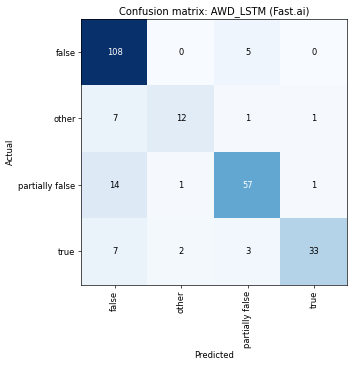

In [ ]:
interp.plot_confusion_matrix(figsize=(6,6), dpi=60,title='Confusion matrix: AWD_LSTM (Fast.ai)')

In [ ]:
interp.most_confused(min_val=2)

[('false', 'partially false', 14),
 ('partially false', 'false', 8),
 ('other', 'true', 6),
 ('true', 'partially false', 5),
 ('other', 'false', 4),
 ('other', 'partially false', 2),
 ('partially false', 'true', 2)]

# Submission

In [ ]:
import math
data_raw = pd.read_csv('English_data_test_release_with_rating.csv')
data_raw['title'] = data_raw['title'].replace(math.nan,' ')
data_raw['fullmsg'] = data_raw['title'] + ' ' + data_raw['text']

In [ ]:
data_raw

,ID,text,title,our rating,fullmsg
0,122653045997905671927713471889615536378,"The deputy secretary at the US Treasury has said that the only way to end the plague of empty shelves and high prices around the country is for every person in the world to be vaccinated. In an interview to ABC on Thursday, Wally Adeyemo, the Biden administration’s second-highest official in the Treasury Department, has commented on the ongoing shortages of consumer goods that have led many to mock the president as ‘Empty Shelves Joe’. Despite viral photos depicting thousands of cargo ships lined up at the Port of Los Angeles ready to unload their goods, Adeyemo claimed that the supply c...",US Treasury deputy sec warns that shortages likely to continue until EVERYONE is jabbed,Partially false,"US Treasury deputy sec warns that shortages likely to continue until EVERYONE is jabbed The deputy secretary at the US Treasury has said that the only way to end the plague of empty shelves and high prices around the country is for every person in the world to be vaccinated. In an interview to ABC on Thursday, Wally Adeyemo, the Biden administration’s second-highest official in the Treasury Department, has commented on the ongoing shortages of consumer goods that have led many to mock the president as ‘Empty Shelves Joe’. Despite viral photos depicting thousands of cargo ships lined up a..."
1,275389285957305997321446227088442471741,"KABUL—Approximately twelve minutes after U.S. troops withdrew from Afghanistan, Taliban fighters have completely taken over the entire country. ""Woah, that's a bummer,"" said the Biden Administration's foreign policy team. ""We didn't see that one coming."" As the Taliban began its campaign of shooting and killing, as is their time-honored tradition, CNN anchors gushed with praise after noticing all the Taliban fighters were responsibly wearing masks to protect themselves and others from COVID. ""Wow! In the midst of the battle and bloodshed, these noble desert knights of Islamic superiorit...",CNN Praises Taliban For Wearing Masks During Attack,Other,"CNN Praises Taliban For Wearing Masks During Attack KABUL—Approximately twelve minutes after U.S. troops withdrew from Afghanistan, Taliban fighters have completely taken over the entire country. ""Woah, that's a bummer,"" said the Biden Administration's foreign policy team. ""We didn't see that one coming."" As the Taliban began its campaign of shooting and killing, as is their time-honored tradition, CNN anchors gushed with praise after noticing all the Taliban fighters were responsibly wearing masks to protect themselves and others from COVID. ""Wow! In the midst of the battle and bloodsh..."
2,333248764296609831067233855420575814716,"The vast majority of (oblivious) Americans have dismissed all this as a “conspiracy theory,” and now they’re shocked and frightened by the realization that covid internment camps are being actively deployed across America. On Friday, Tennessee Gov. Bill Lee signed Executive Order 83, which authorizes National Guard and State Guard troops to break into peoples’ homes, kidnap them at gunpoint, and take them to covid internment camps, all without any due process or respect for civil rights. Individuals can be targeted for this medical kidnapping by armed troops via “telephone assessments,” a...",Tennessee Has Just LEGALIZED Government COVID Kidnappings! – The Daily Allegiant,false,"Tennessee Has Just LEGALIZED Government COVID Kidnappings! – The Daily Allegiant The vast majority of (oblivious) Americans have dismissed all this as a “conspiracy theory,” and now they’re shocked and frightened by the realization that covid internment camps are being actively deployed across America. On Friday, Tennessee Gov. Bill Lee signed Executive Order 83, which authorizes National Guard and State Guard troops to break into peoples’ homes, kidnap them at gunpoint, and take them to covid internment camps, all without any due process or respect for civil rights. Individ

In [ ]:
from tqdm.notebook import tqdm
predicted_rating = []
for data in tqdm(data_raw.fullmsg):
  predicted_rating.append(learn.predict(data)[0])
data_raw['predicted_rating'] = predicted_rating
data_raw = data_raw.drop(labels=['fullmsg'], axis=1)
data_raw

In [ ]:
data_raw['our rating'] = data_raw['our rating'].map({'True': 1, 'FALSE': 0,'false':0, 'Partially false': 2, 'Other': 3})

In [ ]:
data_raw['predicted_rating'] = data_raw['predicted_rating'].map({'true': 1, 'false': 0, 'partially false': 2, 'other': 3})

In [ ]:
data_raw = data_raw.drop(columns={'text', 'ID', 'title'})

In [ ]:
data_raw

,our rating,predicted_rating
0,2,0
1,3,0
2,0,0
3,0,0
4,0,0
...,...,...
607,0,0
608,3,0
609,1,0
610,0,0


In [ ]:
# category to list binary 
def pp(data):
  p = []
  for i,v in enumerate(data):
    if v==1:
      p.append([1, 0, 0, 0])
    elif v==0:
      p.append([0, 1, 0, 0])
    elif v==2:
      p.append([0, 0, 1, 0])
    if v==3:
      p.append([0, 0, 0, 1])
  return p


In [ ]:
data_raw['our rating list'] = pp(data_raw['our rating'])

In [ ]:
data_raw['predicted_rating list'] = pp(data_raw['predicted_rating'])

In [ ]:
data_raw

,our rating,predicted_rating,our rating list,predicted_rating list
0,2,0,"[0, 0, 1, 0]","[0, 1, 0, 0]"
1,3,0,"[0, 0, 0, 1]","[0, 1, 0, 0]"
2,0,0,"[0, 1, 0, 0]","[0, 1, 0, 0]"
3,0,0,"[0, 1, 0, 0]","[0, 1, 0, 0]"
4,0,0,"[0, 1, 0, 0]","[0, 1, 0, 0]"
...,...,...,...,...
607,0,0,"[0, 1, 0, 0]","[0, 1, 0, 0]"
608,3,0,"[0, 0, 0, 1]","[0, 1, 0, 0]"
609,1,0,"[1, 0, 0, 0]","[0, 1, 0, 0]"
610,0,0,"[0, 1, 0, 0]","[0, 1, 0, 0]"


In [ ]:
# Our vectorized labels
y_testC = np.array([np.array(val) for val in data_raw['our rating list']])
y_trainC = np.array([np.array(val) for val in data_raw['predicted_rating list']])

In [ ]:
import re, string, unicodedata
import inflect
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import tree
from sklearn import linear_model, naive_bayes, metrics, svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,f1_score,confusion_matrix,roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.model_selection import GridSearchCV
import xgboost
from collections import Counter
#Function to create ROC curve
import matplotlib.pyplot as plt
def plot_roc_curve(fpr,tpr):
    plt.plot([0,1],[0,1],color='darkblue',label='Guessing',linestyle='--')

    plt.plot(fpr,tpr,color='orange',label='ROC')
    plt.xlabel('False Positve Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Area Under ROC curve')
    plt.show()
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = (np.trace(cf) / float(np.sum(cf))) * 100

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.2f} %\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

In [ ]:
data_raw

,our rating,predicted_rating,our rating list,predicted_rating list
0,2,0,"[0, 0, 1, 0]","[0, 1, 0, 0]"
1,3,0,"[0, 0, 0, 1]","[0, 1, 0, 0]"
2,0,0,"[0, 1, 0, 0]","[0, 1, 0, 0]"
3,0,0,"[0, 1, 0, 0]","[0, 1, 0, 0]"
4,0,0,"[0, 1, 0, 0]","[0, 1, 0, 0]"
...,...,...,...,...
607,0,0,"[0, 1, 0, 0]","[0, 1, 0, 0]"
608,3,0,"[0, 0, 0, 1]","[0, 1, 0, 0]"
609,1,0,"[1, 0, 0, 0]","[0, 1, 0, 0]"
610,0,0,"[0, 1, 0, 0]","[0, 1, 0, 0]"


In [ ]:
y_trainC.argmax(axis=1)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 3, 2, 1, 1, 0, 0, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 0, 1, 1, 1, 2,
       1, 1, 2, 3, 2, 1, 1, 1, 1, 1, 2, 2, 2, 0, 1, 1, 1, 1, 1, 1, 2, 1,
       3, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 3, 1, 0, 1, 1, 1, 1,
       1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 3, 1, 1, 0, 2, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 2, 2, 1, 1, 1, 2, 2, 0, 1, 1, 0, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 2, 3, 1, 1, 2, 1, 2, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 0, 2, 1, 3,
       2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 1, 1, 0, 2, 1,

              precision    recall  f1-score   support

           0       0.75      0.17      0.28       210
           1       0.58      0.80      0.68       315
           2       0.10      0.18      0.12        56
           3       0.08      0.06      0.07        31

    accuracy                           0.49       612
   macro avg       0.38      0.30      0.29       612
weighted avg       0.57      0.49      0.46       612




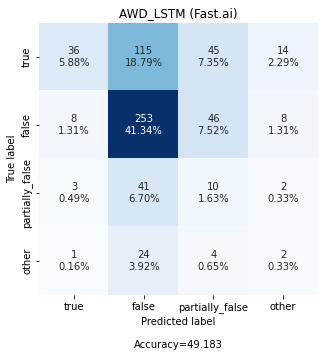

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,f1_score,confusion_matrix,roc_curve
print(classification_report(y_testC.argmax(axis=1), y_trainC.argmax(axis=1)))
cf_1 =confusion_matrix(y_testC.argmax(axis=1), y_trainC.argmax(axis=1))
# print(cf_1)
print()
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['true','false', 'partially_false', 'other']
make_confusion_matrix(cf_1, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues',figsize=(5,5),cbar=False,title='AWD_LSTM (Fast.ai)')

In [ ]:
teamName = 'DIU_SpeedOut'
fileName = f'subtask3_english_{teamName}'
data_raw.to_csv(f'{fileName}.tsv', sep='\t', index=False)
fileNameZip = f'{fileName}.zip'
fileNameTsv = f'{fileName}.tsv'
!zip $fileNameZip $fileNameTsv
!cp /content/subtask3_english_DIU_SpeedOut.zip /content/drives/clef2020/submission/2
!rm -rf /content/subtask3_english_DIU_SpeedOut.tsv /content/subtask3_english_DIU_SpeedOut.zip

  adding: subtask3_english_DIU_SpeedOut.tsv (deflated 64%)
